In [1]:
import pandas as pd;
import numpy as np;
import scipy as sp;
import sklearn;
import sys;
from nltk.corpus import stopwords;
import nltk;
from gensim.models import ldamodel
import gensim.corpora;
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer;
from sklearn.preprocessing import normalize;
import pickle;

C:\Users\hyh6hhy\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
data = pd.read_csv('./data/headline.csv')

In [3]:
data.head(20)

,id,headline,pub_date,month,keywords_name,keywords_value
0,5c2d52db3a125f5075c029ae,"Daryl Dragon, of the Captain and Tennille Pop ...",2019-01-03T00:10:00+0000,1,persons,"Dragon, Daryl (1942-2019)"
1,5c2d38833a125f5075c02974,Where Doulas Calm Nerves and Bridge Cultures D...,2019-01-02T22:17:38+0000,1,glocations,Sweden
2,5c2cee413a125f5075c028db,Voting Issues and Gerrymanders Are Now Key Pol...,2019-01-02T17:00:47+0000,1,subject,Politics and Government
3,5c2d02703a125f5075c028fd,Protecting Pregnant Workers,2019-01-02T18:26:54+0000,1,subject,Family Leaves
4,5c2d03dd3a125f5075c02901,When Louis C.K. Crossed a Line,2019-01-02T18:32:59+0000,1,persons,"C K, Louis"
5,5c2da4e73a125f5075c02a12,What’s on TV Thursday: ‘Support the Girls’ and...,2019-01-03T06:00:04+0000,1,subject,Television
6,5c2cb0933a125f5075c0286f,"2 Indian Women Enter Sabarimala Temple, Settin...",2019-01-02T12:37:37+0000,1,glocations,India
7,5c2e2f0f3a125f5075c02b01,Our Daughter’s Rich Friends Are Driving Me Nuts,2019-01-03T15:49:33+0000,1,subject,"Customs, Etiquette and Manners"
8,5c2d3b713a125f5075c0297f,What to Do When You Think You’re About to Get ...,2019-01-02T22:30:06+0000,1,subject,Labor and Jobs
9,5c2af8393a125f5075c026c9,On Politics: Elizabeth Warren Is Running for P...,2019-01-01T05:18:48+0000,1,subject,United States Politics and Government


In [4]:
data.keywords_name.value_counts()

subject           18562
persons            3373
None               2733
glocations         1659
organizations      1367
creative_works      128
Name: keywords_name, dtype: int64

# Baseline1

In [5]:
#data[data.keywords_value == "Shutdowns (Institutional)"]
results = []
import texttable as tt
headlines = []
target = 13
print("Target : "+data.iloc[target]['headline'])
keywords = data.iloc[target]['keywords_value']
keywords_list = []

headlines = data[data.keywords_value == keywords].iloc[0:10]['headline'].tolist()
for i in range(len(headlines)):
    keywords_list.append(keywords)
#index_list,results = find_top_headlines(target)
#for ii in index_list:
#    headlines.append(data_text.iloc[ii]['headline'])
#[601, 852, 666, 364, 509, 835, 822, 554, 989, 190]
tab = tt.Texttable()
headings = ['Keywords','Headlines']
tab.header(headings)
headlines = headlines
keywords = keywords
for row in zip(keywords_list,headlines):
    tab.add_row(row)
s = tab.draw()
print(s)


Target : The Trump Tax Cut: Even Worse Than You’ve Heard
+-----------------+------------------------------------------------------------+
|    Keywords     |                         Headlines                          |
+=================+============================================================+
| Corporate Taxes | The Trump Tax Cut: Even Worse Than You’ve Heard            |
+-----------------+------------------------------------------------------------+
| Corporate Taxes | The Trump Tax Cut: Even Worse Than You’ve Heard            |
+-----------------+------------------------------------------------------------+
| Corporate Taxes | Their Tax Rate Is 0%                                       |
+-----------------+------------------------------------------------------------+
| Corporate Taxes | Their Tax Rate Is 0%                                       |
+-----------------+------------------------------------------------------------+
| Corporate Taxes | Profitable Giants Like Amazon Pa

# Baseline2

In [6]:
#data[data.keywords_value == "Shutdowns (Institutional)"]
results = []
import texttable as tt
headlines = []
target = 13
print("Target : "+data.iloc[target]['headline'])
keywords = data.iloc[target]['keywords_name']
keywords_list = []

headlines = data[data.keywords_name == keywords].iloc[0:10]['headline'].tolist()
for i in range(len(headlines)):
    keywords_list.append(keywords)
#index_list,results = find_top_headlines(target)
#for ii in index_list:
#    headlines.append(data_text.iloc[ii]['headline'])
#[601, 852, 666, 364, 509, 835, 822, 554, 989, 190]
tab = tt.Texttable()
headings = ['Keywords','Headlines']
tab.header(headings)
headlines = headlines
keywords = keywords
for row in zip(keywords_list,headlines):
    tab.add_row(row)
s = tab.draw()
print(s)
#keywords

Target : The Trump Tax Cut: Even Worse Than You’ve Heard
+----------+-------------------------------------------------------------------+
| Keywords |                             Headlines                             |
+==========+===================================================================+
| subject  | Voting Issues and Gerrymanders Are Now Key Political              |
|          | Battlegrounds                                                     |
+----------+-------------------------------------------------------------------+
| subject  | Protecting Pregnant Workers                                       |
+----------+-------------------------------------------------------------------+
| subject  | What’s on TV Thursday: ‘Support the Girls’ and ‘Black Mirror:     |
|          | Bandersnatch’                                                     |
+----------+-------------------------------------------------------------------+
| subject  | Our Daughter’s Rich Friends Are Driving

In [7]:
import matplotlib.pyplot as plt
plt.axis('equal')
plt.pie(data.month.value_counts(),labels=("Jan", "Feb","Mar","Apr"))
plt.title("Time distribution");


# WordCloud

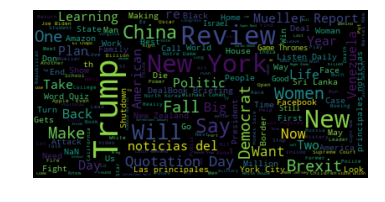

In [8]:
from wordcloud import WordCloud
sum_lines = data.headline.to_string()
token_freq = WordCloud().process_text(sum_lines)
filtered_lines = WordCloud().process_text(sum_lines)
wordcloud = WordCloud(max_font_size=40).fit_words(token_freq)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [9]:
data = data.dropna()

In [10]:
data.shape

(27663, 6)

In [11]:
data_text = data[['headline']]

In [12]:
data_text.head()

,headline
0,"Daryl Dragon, of the Captain and Tennille Pop ..."
1,Where Doulas Calm Nerves and Bridge Cultures D...
2,Voting Issues and Gerrymanders Are Now Key Pol...
3,Protecting Pregnant Workers
4,When Louis C.K. Crossed a Line


In [13]:
data_text.headline.isnull().sum()

0

In [14]:
#uncomment and reduce the size
#data_text = data_text.iloc[:500];

In [15]:
data_text = data_text.astype('str')

In [16]:
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
numbers = '''1234567890'''
def remove_p_n(x):
    x = x.lower()
    y = ''
    for ii in x:
        if ii not in punctuations and ii not in numbers:
            y = y+ii
    return y
data_text['headline_update'] = data_text['headline'].apply(remove_p_n);

In [17]:
data_text = data_text.drop_duplicates(subset=['headline_update'], keep='first')
data_text.shape

(14887, 2)

In [18]:

def remove_stop(x):
    y = []
    for ii in x.split():
        if ii not in stopwords.words():
            y.append(ii)
    return y
data_text['headline_update'] = data_text['headline_update'].apply(remove_stop);

In [19]:
data_text.head()

,headline,headline_update
0,"Daryl Dragon, of the Captain and Tennille Pop ...","[daryl, dragon, captain, tennille, pop, duo]"
1,Where Doulas Calm Nerves and Bridge Cultures D...,"[doulas, calm, nerves, bridge, cultures, child..."
2,Voting Issues and Gerrymanders Are Now Key Pol...,"[voting, issues, gerrymanders, key, political,..."
3,Protecting Pregnant Workers,"[protecting, pregnant, workers]"
4,When Louis C.K. Crossed a Line,"[louis, ck, crossed, line]"


In [22]:
#save data because it takes very long to remove stop words
#pickle.dump(data_text, open('data_text.dat', 'wb'))

In [23]:
import gensim
w2v_mod = gensim.models.KeyedVectors.load_word2vec_format("data/GoogleNews-vectors-negative300-SLIM.bin.gz", binary=True)

In [24]:
#my_model.wv.vocab.keys()

In [25]:
#w2v_mod.wv.vocab.keys()

In [26]:
data_text.head()

,headline,headline_update
0,"Daryl Dragon, of the Captain and Tennille Pop ...","[daryl, dragon, captain, tennille, pop, duo]"
1,Where Doulas Calm Nerves and Bridge Cultures D...,"[doulas, calm, nerves, bridge, cultures, child..."
2,Voting Issues and Gerrymanders Are Now Key Pol...,"[voting, issues, gerrymanders, key, political,..."
3,Protecting Pregnant Workers,"[protecting, pregnant, workers]"
4,When Louis C.K. Crossed a Line,"[louis, ck, crossed, line]"


In [27]:
def embedding(x):
    v2 = 0
    count = 0
    for word in x:
        if word in w2v_mod.wv.vocab.keys():
            v2 = v2+w2v_mod[word]
            count = count+1
    try:
        v2 = v2/count
    except:
        print(x)
        v2 = v2
    return v2
data_text['embedding'] = data_text['headline_update'].apply(embedding);


C:\Users\hyh6hhy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """


['resumen', 'noticias', 'jueves']
['كان', 'مقتل', 'مُسعفة', 'غزّة', 'يد', 'جندي', 'إسرائيلي', 'حادثاً؟']
['resumen', 'noticias', 'viernes']
['maura', 'whang', 'deegan', 'mcclung']
['graceann', 'caramico', 'alfonse', 'muglia']
['年最值得去的个地方']
['lugares', 'visitar']
['年最值得去的個地方']
['frontera', 'méxico', 'unidos']
['mackenzie', 'bezos']
['guarneri', 'gesù', '“prince', 'doria”']
['أختي', 'سجن', 'سعودي', 'ستلتزم', 'الولايات', 'المتحدة', 'الصمت؟']
['‘israelipalestinian', 'conflict’']
['willenbrock', 'piotr', 'osmenda']
['resumen', 'noticias', 'miércoles']
['‘how’s', 'hangin’’']
['أرادت', 'تقود', 'سيارة', 'فقام', 'الحاكم', 'السعودي', 'بسجنها', 'وتعذيبها']
['outré']
['日本のワーキングマザー', '妻の過大な負担・夫の過少な支援']
['‘let’s', 'it’']
['frida', 'kahlo']
['اختفاء', 'أميرة', 'شريط', 'فيديو', 'يقدم', 'أدلة', 'مقلقة']
['‘shape', 'shifters’']
['herz']
['cydney', 'blitzer']
['‘race', 'costume’']
['selfcompassionate']
['preguntas', 'enamorarse', 'cualquiera']
['choque', 'frontera', 'difusa', 'línea', 'separa', 'méxico',

In [28]:
data_text.embedding.isnull().sum()

0

In [29]:
from scipy.spatial.distance import cosine

def find_top_headlines(target_index):
    index_list = []
    #results = []
    text = {}
    for idx in range(len(data_text)):
        text[idx] = 1-cosine(data_text.iloc[target_index]['embedding'],data_text.iloc[idx]['embedding'])
    sorted_text_top = sorted(text.items(), key=lambda x: x[1], reverse=True)[1:10]
    for ele in sorted_text_top:
        index_list.append(ele[0])
        results.append(ele[1])
    #print(index_list)
    return index_list,results

# test

In [30]:
#data_ori = data[['headline']]

In [31]:
results = []
import texttable as tt
headlines = []
target = 11
print("Target : "+data_text.iloc[target]['headline'])
index_list,results = find_top_headlines(target)
for ii in index_list:
    headlines.append(data_text.iloc[ii]['headline'])
#[601, 852, 666, 364, 509, 835, 822, 554, 989, 190]
tab = tt.Texttable()
headings = ['Cosine','Headlines',]#,'Weights','Costs','Unit_Costs']
tab.header(headings)
headlines = headlines
for row in zip(results,headlines):
    tab.add_row(row)
s = tab.draw()
print(s)

Target : Quotation of the Day: Louis C.K. Mocks Parkland School Shooting Survivors in Recent Set


C:\Users\hyh6hhy\Anaconda3\lib\site-packages\scipy\spatial\distance.py:698: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


+--------+---------------------------------------------------------------------+
| Cosine |                              Headlines                              |
+========+=====================================================================+
| 0.618  | One Dead in Synagogue Shooting Near San Diego; Officials Call It    |
|        | Hate Crime                                                          |
+--------+---------------------------------------------------------------------+
| 0.598  | Quotation of the Day: 210-Foot Fatberg Blocks Sewers of English     |
|        | Seaside Town                                                        |
+--------+---------------------------------------------------------------------+
| 0.591  | Quotation of the Day: A Mother’s Fatal Fall on Subway Stairs Rouses |
|        | New Yorkers to Demand Accessibility                                 |
+--------+---------------------------------------------------------------------+
| 0.591  | What Students Are

# train my own model

In [32]:
import gensim, logging
from gensim.models import Word2Vec
logging.basicConfig(format = "%(asctime)s : %(levelname)s : %(message)s", level = 1)
#test = [['first', 'sentence'], ['second', 'sentence']]
data_list = data_text['headline_update'].tolist()
#my_model = Word2Vec(data_list, size=300)
my_model = gensim.models.Word2Vec(
    data_list,
    size=150,
    window=10,
    min_count=2,
    workers=10)
my_model.train(data_list, total_examples=len(data_list), epochs=10)

2019-05-01 18:12:31,531 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2019-05-01 18:12:31,531 : INFO : collecting all words and their counts
2019-05-01 18:12:31,531 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-05-01 18:12:31,551 : INFO : PROGRESS: at sentence #10000, processed 61434 words, keeping 15919 word types
2019-05-01 18:12:31,561 : INFO : collected 20097 word types from a corpus of 91686 raw words and 14887 sentences
2019-05-01 18:12:31,561 : INFO : Loading a fresh vocabulary
2019-05-01 18:12:31,689 : INFO : min_count=2 retains 9179 unique words (45% of original 20097, drops 10918)
2019-05-01 18:12:31,689 : INFO : min_count=2 leaves 80768 word corpus (88% of original 91686, drops 10918)
2019-05-01 18:12:31,719 : INFO : deleting the raw counts dictionary of 20097 items
2019-05-01 18:12:31,719 : INFO : sample=0.001 downsamples 9 most-common words
2019-05-01 18:12:31,719 : INFO : downsampling leaves estimated 

2019-05-01 18:12:32,694 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-01 18:12:32,704 : INFO : EPOCH - 4 : training on 91686 raw words (79202 effective words) took 0.2s, 414032 effective words/s
2019-05-01 18:12:32,724 : DEBUG : job loop exiting, total 10 jobs
2019-05-01 18:12:32,764 : DEBUG : worker exiting, processed 1 jobs
2019-05-01 18:12:32,774 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-05-01 18:12:32,804 : DEBUG : worker exiting, processed 1 jobs
2019-05-01 18:12:32,824 : DEBUG : worker exiting, processed 1 jobs
2019-05-01 18:12:32,814 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-05-01 18:12:32,814 : DEBUG : worker exiting, processed 1 jobs
2019-05-01 18:12:32,814 : DEBUG : worker exiting, processed 1 jobs
2019-05-01 18:12:32,814 : DEBUG : worker exiting, processed 1 jobs
2019-05-01 18:12:32,844 : DEBUG : worker exiting, processed 1 jobs
2019-05-01 18:12:32,848 : DEBUG : worker exiting, processed

2019-05-01 18:12:33,668 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-05-01 18:12:33,668 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-05-01 18:12:33,678 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-05-01 18:12:33,678 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-05-01 18:12:33,648 : DEBUG : worker exiting, processed 1 jobs
2019-05-01 18:12:33,658 : DEBUG : worker exiting, processed 1 jobs
2019-05-01 18:12:33,618 : DEBUG : worker exiting, processed 1 jobs
2019-05-01 18:12:33,678 : DEBUG : worker exiting, processed 1 jobs
2019-05-01 18:12:33,648 : DEBUG : worker exiting, processed 1 jobs
2019-05-01 18:12:33,648 : DEBUG : worker exiting, processed 1 jobs
2019-05-01 18:12:33,658 : DEBUG : worker exiting, processed 1 jobs
2019-05-01 18:12:33,688 : DEBUG : worker exiting, processed 1 jobs
2019-05-01 18:12:33,688 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-0

2019-05-01 18:12:34,593 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-01 18:12:34,593 : INFO : EPOCH - 8 : training on 91686 raw words (79190 effective words) took 0.2s, 463674 effective words/s
2019-05-01 18:12:34,613 : DEBUG : job loop exiting, total 10 jobs
2019-05-01 18:12:34,673 : DEBUG : worker exiting, processed 1 jobs
2019-05-01 18:12:34,673 : INFO : worker thread finished; awaiting finish of 9 more threads
2019-05-01 18:12:34,693 : DEBUG : worker exiting, processed 1 jobs
2019-05-01 18:12:34,723 : DEBUG : worker exiting, processed 1 jobs
2019-05-01 18:12:34,703 : DEBUG : worker exiting, processed 1 jobs
2019-05-01 18:12:34,693 : INFO : worker thread finished; awaiting finish of 8 more threads
2019-05-01 18:12:34,723 : DEBUG : worker exiting, processed 1 jobs
2019-05-01 18:12:34,733 : DEBUG : worker exiting, processed 1 jobs
2019-05-01 18:12:34,753 : DEBUG : worker exiting, processed 1 jobs
2019-05-01 18:12:34,753 : DEBUG : worker exiting, processed

(792144, 916860)

In [33]:
def my_embedding(x):
    v2 = 0
    count = 0
    for word in x:
        if word in my_model.wv.vocab.keys():
            v2 = v2+my_model[word]
            count = count+1
    try:
        v2 = v2/count
    except:
        print(x)
        v2 = v2
    return v2
data_text['my_embedding'] = data_text['headline_update'].apply(my_embedding);


C:\Users\hyh6hhy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


['fork']
['كان', 'مقتل', 'مُسعفة', 'غزّة', 'يد', 'جندي', 'إسرائيلي', 'حادثاً؟']
['choreographed', 'cacophony', '‘ferryman’']
['maura', 'whang', 'deegan', 'mcclung']
['graceann', 'caramico', 'alfonse', 'muglia']
['cpr', 'foal']
['年最值得去的个地方']
['lugares', 'visitar']
['年最值得去的個地方']
['cravings']
['composition']
['cardiac', 'contraction']
['brits', 'maths']
['guarneri', 'gesù', '“prince', 'doria”']
['أختي', 'سجن', 'سعودي', 'ستلتزم', 'الولايات', 'المتحدة', 'الصمت؟']
['‘israelipalestinian', 'conflict’']
['acupuncture']
['kaartiga', 'sivanesan', 'rajiv', 'menjoge']
['willenbrock', 'piotr', 'osmenda']
['dispossessed']
['‘how’s', 'hangin’’']
['kindness', 'skill']
['unproductive']
['أرادت', 'تقود', 'سيارة', 'فقام', 'الحاكم', 'السعودي', 'بسجنها', 'وتعذيبها']
['outré']
['日本のワーキングマザー', '妻の過大な負担・夫の過少な支援']
['reaganesque', 'bloodcurdling']
['hue']
['اختفاء', 'أميرة', 'شريط', 'فيديو', 'يقدم', 'أدلة', 'مقلقة']
['neuroscience', '‘rockabye', 'baby’']
['‘shape', 'shifters’']
['herz']
['mathew', 'luce']
['cydn

In [34]:
from scipy.spatial.distance import cosine
def find_top_headlines(target_index):
    index_list = []
    results = []
    text = {}
    for idx in range(len(data_text)):
        k = 1-cosine(data_text.iloc[target_index]['my_embedding'],data_text.iloc[idx]['my_embedding'])
        if np.isnan(k):
            continue
        else:
            text[idx] = k
    #clean_text = filter(lambda k: not isnan(text[k]), text)
    #print(type(clean_text))
    sorted_text_top = sorted(text.items(), key=lambda x: x[1], reverse=True)[1:10]
    for ele in sorted_text_top:
        index_list.append(ele[0])
        my_results.append(ele[1])
    #print(index_list)
    #print(my_results)
    return index_list,results

# my_model test

In [35]:
my_results = []
import texttable as tt
my_headlines = []
target = 11
print("Target : "+data_text.iloc[target]['headline'])
index_list,results = find_top_headlines(target)
for ii in index_list:
    my_headlines.append(data_text.iloc[ii]['headline'])
#[601, 852, 666, 364, 509, 835, 822, 554, 989, 190]
tab = tt.Texttable()
headings = ['Cosine','Headlines',]#,'Weights','Costs','Unit_Costs']
tab.header(headings)
headlines = headlines
for row in zip(my_results,my_headlines):
    tab.add_row(row)
s = tab.draw()
print(s)

Target : Quotation of the Day: Louis C.K. Mocks Parkland School Shooting Survivors in Recent Set
+--------+---------------------------------------------------------------------+
| Cosine |                              Headlines                              |
+========+=====================================================================+
| 0.999  | Quotation of the Day: ‘Suicide Surcharge’ or Crucial Fee to Fix the |
|        | Subway? Taxi Drivers Brace for Battle Over $2.50 Charge             |
+--------+---------------------------------------------------------------------+
| 0.999  | Quotation of the Day: Woman Tied to Threats Found Dead Near Denver  |
+--------+---------------------------------------------------------------------+
| 0.999  | Quotation of the Day: A Family Seeks Asylum, Battling Back After    |
|        | Zealots Attack                                                      |
+--------+---------------------------------------------------------------------+
| 0.999  | Q

In [36]:
#get the words as an array for lda input
train_headlines = [value[0] for value in data_text.iloc[0:].values];

In [37]:
#number of topics we will cluster for: 10
num_topics = 10;

# LDA

In [38]:
## We will use the gensim library for LDA. First, we obtain a id-2-word dictionary. For each headline, we will use the dictionary to obtain a mapping of the word id to their word counts. The LDA model uses both of these mappings.

# generating LDA topics